In [2]:
!pip install pandas 


In [2]:
import pandas as pd
import numpy as np

In [3]:

pd.set_option('display.max_rows',300)
print (pd.get_option("display.max_rows"))

300


In [4]:
TP_df = pd.read_csv("IMDb title_principals.csv")
TP_df


,imdb_title_id,ordering,imdb_name_id,category,job,characters
0,tt0000574,1,nm0846887,actress,NaN,"[""Kate Kelly""]"
1,tt0000574,2,nm0846894,actor,NaN,"[""School Master""]"
2,tt0000574,3,nm3002376,actor,NaN,"[""Steve Hart""]"
3,tt0000574,4,nm0170118,actress,NaN,NaN
4,tt0000574,5,nm0846879,director,NaN,NaN
...,...,...,...,...,...,...
377843,tt9903716,5,nm10532693,director,NaN,NaN
377844,tt9903716,6,nm10531260,producer,producer,NaN
377845,tt9903716,7,nm6044359,composer,NaN,NaN
377846,tt9903716,8,nm10532695,cinematographer,NaN,NaN


In [5]:
print(TP_df.isnull().any())

imdb_title_id    False
ordering         False
imdb_name_id     False
category         False
job               True
characters        True
dtype: bool


In [6]:
TP_df['job']

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
            ...   
377843         NaN
377844    producer
377845         NaN
377846         NaN
377847         NaN
Name: job, Length: 377848, dtype: object

In [7]:
TP_df.count()

imdb_title_id    377848
ordering         377848
imdb_name_id     377848
category         377848
job               96788
characters       153784
dtype: int64

In [8]:
print(TP_df[TP_df[['job','category']].notnull().all(1)])

       imdb_title_id  ordering imdb_name_id  category  \
5          tt0000574         6    nm0317210  producer   
6          tt0000574         7    nm0425854  producer   
7          tt0000574         8    nm0846911  producer   
16         tt0002130         7    nm0019604    writer   
24         tt0002461         5    nm0130633  director   
...              ...       ...          ...       ...   
377826     tt9896916         7    nm9526002  producer   
377827     tt9896916         8    nm4775123  producer   
377828     tt9896916         9    nm9672560  producer   
377829     tt9896916        10   nm10530067  producer   
377844     tt9903716         6   nm10531260  producer   

                              job characters  
5                        producer        NaN  
6                        producer        NaN  
7                        producer        NaN  
16      poem "La Divina Commedia"        NaN  
24                    co-director        NaN  
...                           ...

In [9]:
TP_df['job'].value_counts()

producer                                44262
screenplay                              11084
written by                               4727
director of photography                  4720
story                                    4358
                                        ...  
story "Education of the Heart"              1
novel "Towelhead"                           1
novel "Raintree County"                     1
adaptation, scenario and dialogue by        1
literary collaborator                       1
Name: job, Length: 4549, dtype: int64

In [10]:
TP_df['category'].value_counts()

actor                  100495
actress                 60074
writer                  55867
producer                45719
director                40106
composer                30350
cinematographer         25026
editor                  15290
production_designer      4300
self                      433
archive_footage           185
archive_sound               3
Name: category, dtype: int64

In [11]:
res = TP_df.groupby(["job","category"]).count()
TP_df["job_cate"] = list(zip(TP_df.job,TP_df.category))
res = TP_df["job_cate"].value_counts()
print(res)

(nan, actor)                                                  100495
(nan, actress)                                                 60074
(producer, producer)                                           44261
(nan, director)                                                39632
(nan, composer)                                                29991
                                                               ...  
(novel "Igmanci", writer)                                          1
(based on the book "The Trials Of Oscar Wilde" by, writer)         1
(from the musical comedy by: "Irene " book by, writer)             1
(character created by: Woochi, writer)                             1
(play "Martyr", writer)                                            1
Name: job_cate, Length: 4567, dtype: int64


In [12]:
TP_df=TP_df.drop(columns=['job_cate'])
TP_df

,imdb_title_id,ordering,imdb_name_id,category,job,characters
0,tt0000574,1,nm0846887,actress,NaN,"[""Kate Kelly""]"
1,tt0000574,2,nm0846894,actor,NaN,"[""School Master""]"
2,tt0000574,3,nm3002376,actor,NaN,"[""Steve Hart""]"
3,tt0000574,4,nm0170118,actress,NaN,NaN
4,tt0000574,5,nm0846879,director,NaN,NaN
...,...,...,...,...,...,...
377843,tt9903716,5,nm10532693,director,NaN,NaN
377844,tt9903716,6,nm10531260,producer,producer,NaN
377845,tt9903716,7,nm6044359,composer,NaN,NaN
377846,tt9903716,8,nm10532695,cinematographer,NaN,NaN


In [13]:
TP_df.loc[TP_df['category'] == 'actor'].fillna('performer',inplace = True)

C:\Users\shuei\miniconda3\envs\tfgpu\lib\site-packages\pandas\core\frame.py:4322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [14]:
TP_df.loc[TP_df['category'] == 'actor', 'job'] = 'performer'
TP_df.loc[TP_df['category'] == 'actress', 'job'] = 'performer'
TP_df.loc[TP_df['category'] == 'writer', 'job'] = 'written by'
TP_df.loc[TP_df['category'] == 'producer', 'job'] = 'producer'
TP_df.loc[TP_df['category'] == 'director', 'job'] = 'director'
TP_df.loc[TP_df['category'] == 'composer', 'job'] = 'composer'
TP_df.loc[TP_df['category'] == 'cinematographer', 'job'] = 'supervision'
TP_df.loc[TP_df['category'] == 'editor', 'job'] = 'editor'
TP_df.loc[TP_df['category'] == 'production_designer', 'job'] = 'editor'
TP_df.loc[TP_df['category'] == 'self', 'job'] = 'unknounr'
TP_df.loc[TP_df['category'] == 'archive_footage', 'job'] = 'technician'
TP_df.loc[TP_df['category'] == 'archive_sound', 'job'] = 'technician'

TP_df

,imdb_title_id,ordering,imdb_name_id,category,job,characters
0,tt0000574,1,nm0846887,actress,performer,"[""Kate Kelly""]"
1,tt0000574,2,nm0846894,actor,performer,"[""School Master""]"
2,tt0000574,3,nm3002376,actor,performer,"[""Steve Hart""]"
3,tt0000574,4,nm0170118,actress,performer,NaN
4,tt0000574,5,nm0846879,director,director,NaN
...,...,...,...,...,...,...
377843,tt9903716,5,nm10532693,director,director,NaN
377844,tt9903716,6,nm10531260,producer,producer,NaN
377845,tt9903716,7,nm6044359,composer,composer,NaN
377846,tt9903716,8,nm10532695,cinematographer,supervision,NaN


In [15]:
TP_df.fillna({'job':'performer'}).where (TP_df['category'] == 'actor')
TP_df.fillna({'job':'performer'}).where (TP_df['category'] == 'actress')
TP_df.fillna({'job':'written by'}).where (TP_df['category'] == 'writer')
TP_df.fillna({'job':'producer'}).where (TP_df['category'] == 'producer')
TP_df.fillna({'job':'director'}).where (TP_df['category'] == 'director')
TP_df.fillna({'job':'composer'}).where (TP_df['category'] == 'composer')
TP_df.fillna({'job':'supervision'}).where (TP_df['category'] == 'cinematographer')
TP_df.fillna({'job':'editor'}).where (TP_df['category'] == 'editor')
TP_df.fillna({'job':'editor'}).where (TP_df['category'] == 'production_designer')
TP_df.fillna({'job':'unnown'}).where (TP_df['category'] == 'self')
TP_df.fillna({'job':'technician'}).where (TP_df['category'] == 'archive_footage')
TP_df.fillna({'job':'technician'}).where (TP_df['category'] == 'archive_sound')

,imdb_title_id,ordering,imdb_name_id,category,job,characters
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
377843,NaN,NaN,NaN,NaN,NaN,NaN
377844,NaN,NaN,NaN,NaN,NaN,NaN
377845,NaN,NaN,NaN,NaN,NaN,NaN
377846,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
print(TP_df.isnull().any())

imdb_title_id    False
ordering         False
imdb_name_id     False
category         False
job              False
characters        True
dtype: bool


In [17]:
TP_df.fillna({'characters':'NODATA'})


,imdb_title_id,ordering,imdb_name_id,category,job,characters
0,tt0000574,1,nm0846887,actress,performer,"[""Kate Kelly""]"
1,tt0000574,2,nm0846894,actor,performer,"[""School Master""]"
2,tt0000574,3,nm3002376,actor,performer,"[""Steve Hart""]"
3,tt0000574,4,nm0170118,actress,performer,NODATA
4,tt0000574,5,nm0846879,director,director,NODATA
...,...,...,...,...,...,...
377843,tt9903716,5,nm10532693,director,director,NODATA
377844,tt9903716,6,nm10531260,producer,producer,NODATA
377845,tt9903716,7,nm6044359,composer,composer,NODATA
377846,tt9903716,8,nm10532695,cinematographer,supervision,NODATA


In [18]:
print(TP_df.isnull().any())

imdb_title_id    False
ordering         False
imdb_name_id     False
category         False
job              False
characters        True
dtype: bool


In [19]:
TP_df['job'].value_counts()

performer      160569
written by      55867
producer        45719
director        40106
composer        30350
supervision     25026
editor          19590
unknounr          433
technician        188
Name: job, dtype: int64

In [20]:
import numpy as np
import matplotlib as plt 


In [21]:
TP_df['job'].value_counts(drop=False).plot.ber()

TypeError: value_counts() got an unexpected keyword argument 'drop'

# from tensorflow.keras.callbacks import ModelCheckpoint
import json
#earlystopping_callback = EarlyStopping(monitor='accuracy')
checkpoint = ModelCheckpoint('output/{accuracy:.4f}.hdf5',monitor='accuracy', save_best_only=True, mode='auto')
classifier.fit_generator(training_set,epochs =100)
# serialize model to JSON
# lets assume `model` is main model 
model_json = classifier.to_json()
with open("colors.json", "w") as json_file:
    json.dump(model_json, json_file)

classifier.save_weights("colors.h5")

In [22]:
TP_df['job'].value_counts(drop=False).to_frame().style.bar(vmin=0)

TypeError: value_counts() got an unexpected keyword argument 'drop'

In [23]:
TP_df['job'].hist

<bound method hist_series of 0           performer
1           performer
2           performer
3           performer
4            director
             ...     
377843       director
377844       producer
377845       composer
377846    supervision
377847         editor
Name: job, Length: 377848, dtype: object>

In [24]:
TP_df['category'].hist

<bound method hist_series of 0                 actress
1                   actor
2                   actor
3                 actress
4                director
               ...       
377843           director
377844           producer
377845           composer
377846    cinematographer
377847             editor
Name: category, Length: 377848, dtype: object>

In [25]:
TP_df['characters'].hist

<bound method hist_series of 0            ["Kate Kelly"]
1         ["School Master"]
2            ["Steve Hart"]
3                       NaN
4                       NaN
                ...        
377843                  NaN
377844                  NaN
377845                  NaN
377846                  NaN
377847                  NaN
Name: characters, Length: 377848, dtype: object>

In [31]:
prob1 = TP_df['job'].value_counts()

<AxesSubplot:>

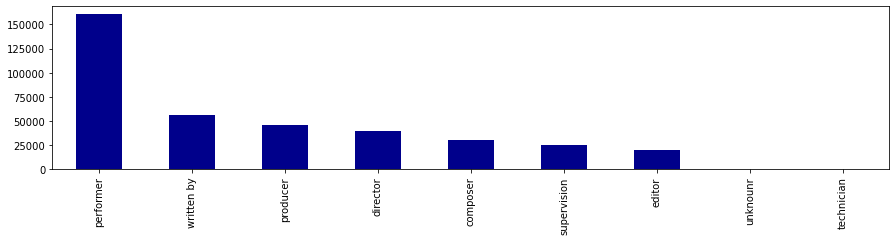

In [32]:
TP_df['job'].value_counts().plot.bar(figsize=(15, 3), color='darkblue')

<AxesSubplot:>

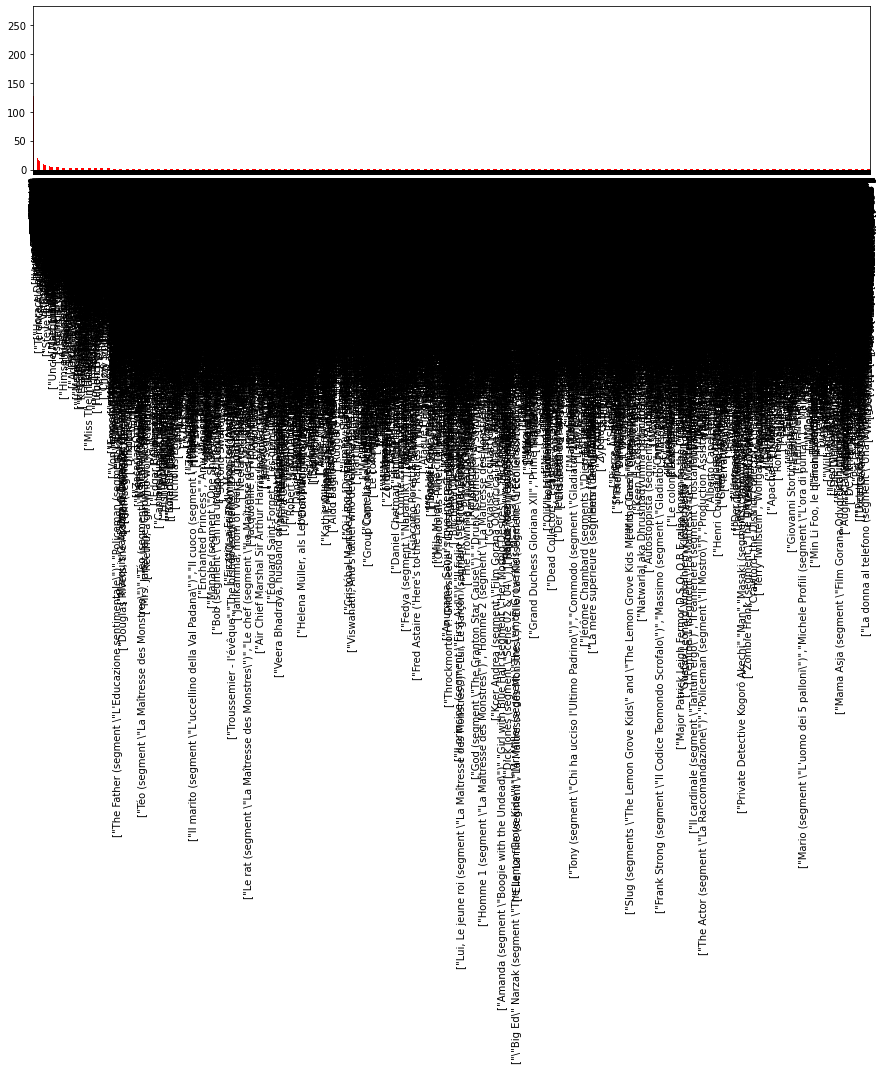

In [33]:
TP_df['characters'].value_counts().plot.bar(figsize=(15, 3), color='red')

<AxesSubplot:>

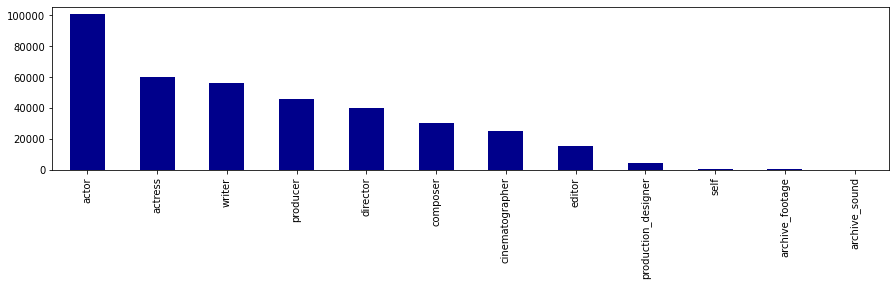

In [26]:
TP_df['category'].value_counts().plot.bar(figsize=(15, 3), color='darkblue')